#**About Dataset**
Diabetes is a chronic condition that affects millions of people worldwide, characterized by elevated blood glucose levels that can lead to severe health complications if not managed properly. Early detection and management of diabetes are crucial for preventing long-term complications. In the context of predictive modeling, the Diabetes Prediction Dataset provides a valuable resource for developing models to identify individuals at risk of developing diabetes based on several key health indicators.

This dataset comprises various feature variables that are instrumental in predicting the onset of diabetes. These features include:

- **Pregnancies:** The number of times a woman has been pregnant.
- **Glucose:** The plasma glucose concentration a few hours after eating.
- **Diastolic Blood Pressure (Diastolic):** The diastolic blood pressure, measured in mm Hg.
- **Triceps Skin Fold Thickness (Triceps):** The thickness of the skin fold on the triceps, used to estimate body fat.
- **Insulin:** The serum insulin level, measured in micro U/ml.
- **Body Mass Index (BMI):** A measure of body fat based on height and weight, calculated as weight (kg) / [height (m)]^2.
- **Diabetes Pedigree Function (DPF):** A function that scores the likelihood of diabetes based on family history.
- **Age:** The age of the individual in years.

These variables represent a combination of demographic, physiological, and medical history data, which together provide a comprehensive overview of factors that may contribute to the risk of diabetes. By analyzing this dataset, predictive models can be developed to assist in the early detection and management of diabetes, ultimately helping to improve patient outcomes and reduce the burden of this chronic disease.

In [226]:
import warnings
warnings.filterwarnings('ignore')

#**Importing Libraries and Dataset**

In [227]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns',None)

df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Diabetes.csv")
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [228]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

#**Descibing the dataset**

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [230]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [231]:
df['diabetes'].value_counts()

,count
diabetes,
0,500
1,268


#**Preprocessing as per requirement**

##**Visualizing the outliers in dataset**

<Axes: ylabel='diastolic'>

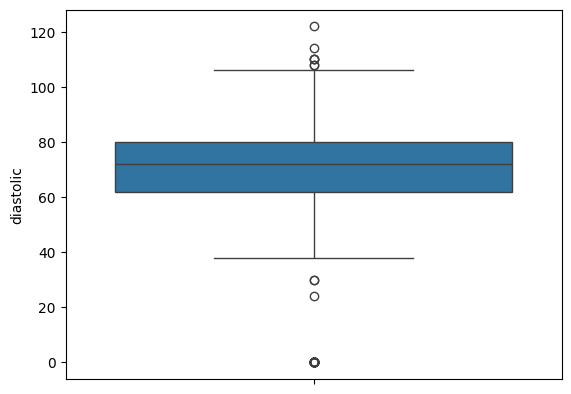

In [232]:
import seaborn as sns
sns.boxplot(df['diastolic'])

<Axes: xlabel='diastolic', ylabel='Density'>

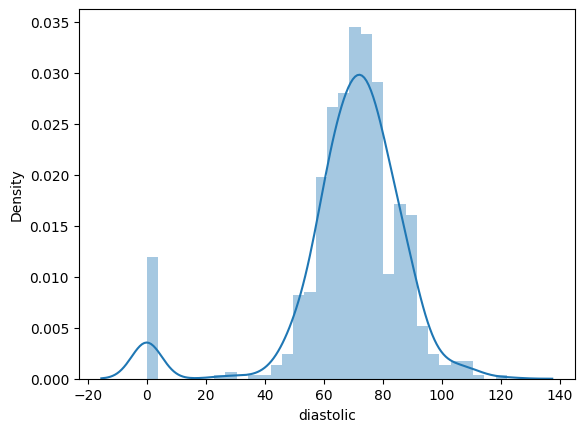

In [233]:
sns.distplot(df['diastolic'])

In [234]:
q1 = df['diastolic'].quantile(0.25)
q3 = df['diastolic'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df['diastolic'] = np.where(df['diastolic'] > max, max, np.where(df['diastolic'] < min, min, df['diastolic']))
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180,32.9,0.171,63,0
764,2,122,70.0,27,0,36.8,0.340,27,0
765,5,121,72.0,23,112,26.2,0.245,30,0
766,1,126,60.0,0,0,30.1,0.349,47,1


<Axes: ylabel='diastolic'>

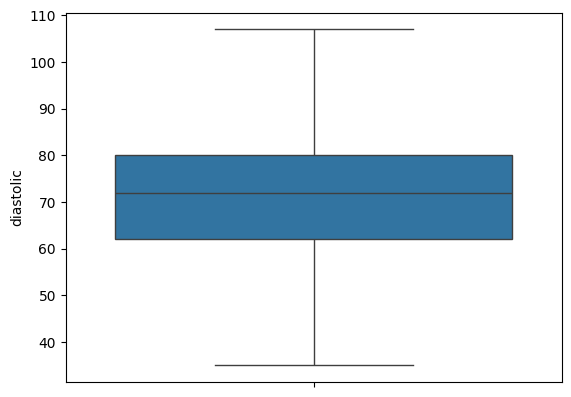

In [235]:
sns.boxplot(df['diastolic'])

<Axes: ylabel='insulin'>

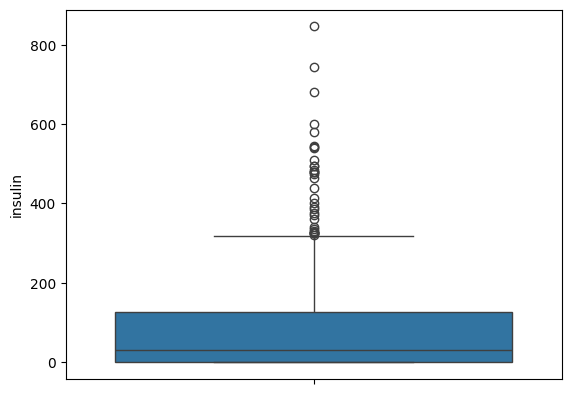

In [236]:
sns.boxplot(df['insulin'])

<Axes: xlabel='insulin', ylabel='Density'>

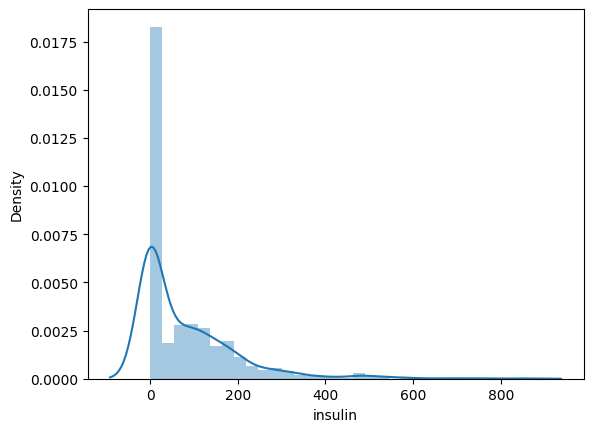

In [237]:
sns.distplot(df['insulin'])

In [238]:
q1 = df['insulin'].quantile(0.25)
q3 = df['insulin'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df['insulin'] = np.where(df['insulin'] > max, max, np.where(df['insulin'] < min, min, df['insulin']))
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72.0,35,0.0,33.6,0.627,50,1
1,1,85,66.0,29,0.0,26.6,0.351,31,0
2,8,183,64.0,0,0.0,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,63,0
764,2,122,70.0,27,0.0,36.8,0.340,27,0
765,5,121,72.0,23,112.0,26.2,0.245,30,0
766,1,126,60.0,0,0.0,30.1,0.349,47,1


<Axes: ylabel='insulin'>

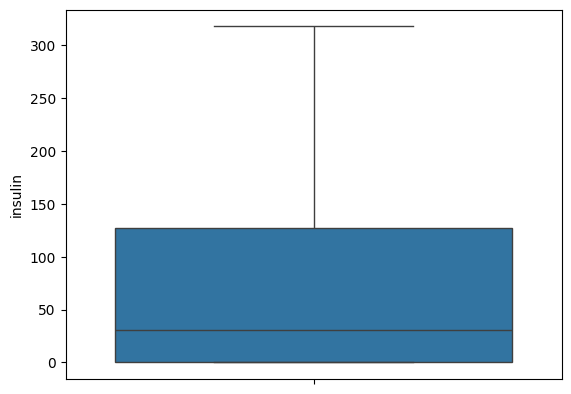

In [239]:
sns.boxplot(df['insulin'])

<Axes: ylabel='bmi'>

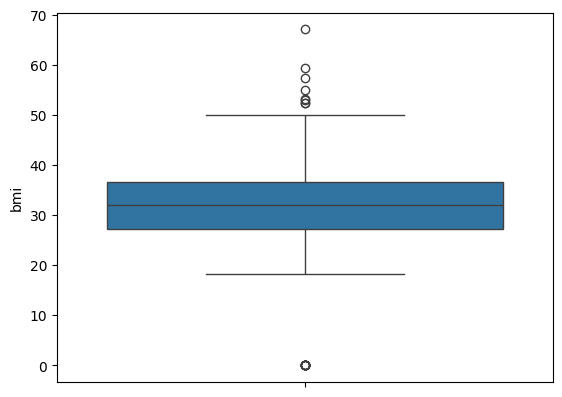

In [240]:
sns.boxplot(df['bmi'])

In [241]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df['bmi'] = np.where(df['bmi'] > max, max, np.where(df['bmi'] < min, min, df['bmi']))
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72.0,35,0.0,33.6,0.627,50,1
1,1,85,66.0,29,0.0,26.6,0.351,31,0
2,8,183,64.0,0,0.0,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,63,0
764,2,122,70.0,27,0.0,36.8,0.340,27,0
765,5,121,72.0,23,112.0,26.2,0.245,30,0
766,1,126,60.0,0,0.0,30.1,0.349,47,1


<Axes: ylabel='bmi'>

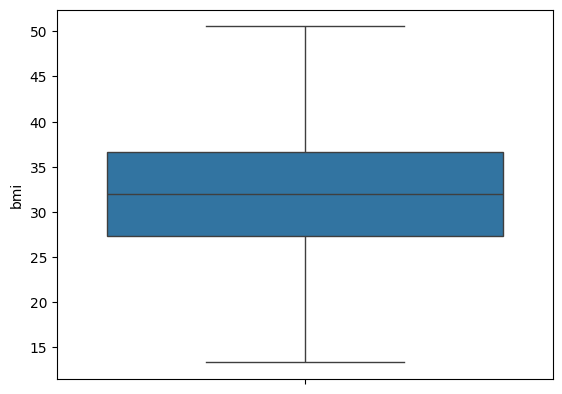

In [242]:
sns.boxplot(df['bmi'])

<Axes: ylabel='dpf'>

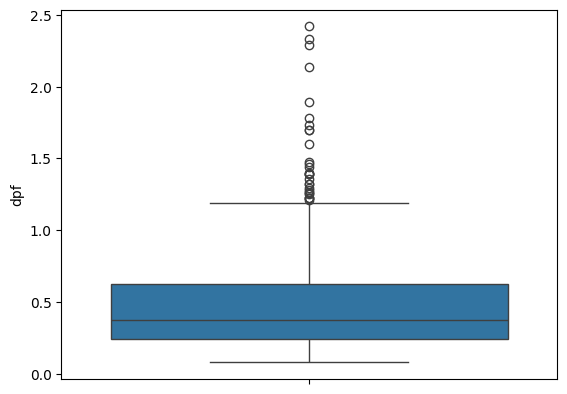

In [243]:
sns.boxplot(df['dpf'])

In [244]:
q1 = df['dpf'].quantile(0.25)
q3 = df['dpf'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df['dpf'] = np.where(df['dpf'] > max, max, np.where(df['dpf'] < min, min, df['dpf']))
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72.0,35,0.0,33.6,0.627,50,1
1,1,85,66.0,29,0.0,26.6,0.351,31,0
2,8,183,64.0,0,0.0,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,1.200,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,63,0
764,2,122,70.0,27,0.0,36.8,0.340,27,0
765,5,121,72.0,23,112.0,26.2,0.245,30,0
766,1,126,60.0,0,0.0,30.1,0.349,47,1


<Axes: ylabel='dpf'>

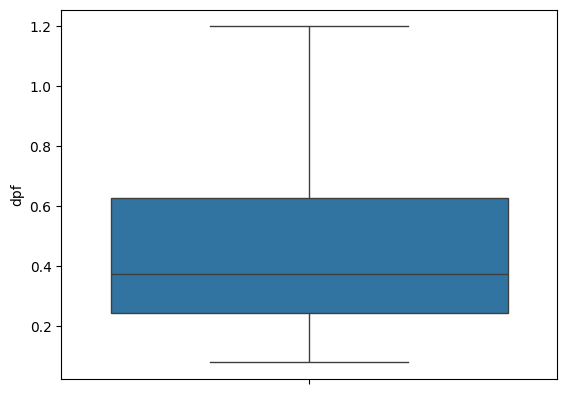

In [245]:
sns.boxplot(df['dpf'])

<Axes: ylabel='age'>

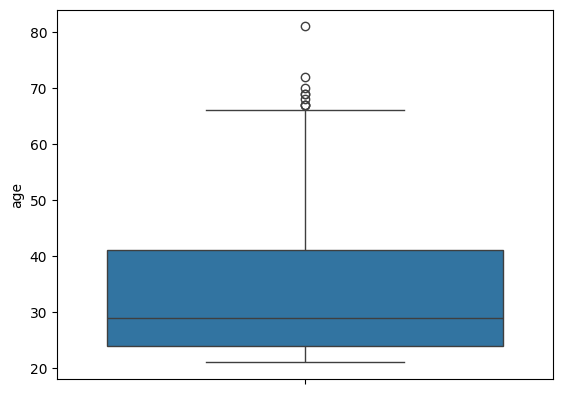

In [246]:
sns.boxplot(df['age'])

In [247]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
df['age'] = np.where(df['age'] > max, max, np.where(df['age'] < min, min, df['age']))
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72.0,35,0.0,33.6,0.627,50.0,1
1,1,85,66.0,29,0.0,26.6,0.351,31.0,0
2,8,183,64.0,0,0.0,23.3,0.672,32.0,1
3,1,89,66.0,23,94.0,28.1,0.167,21.0,0
4,0,137,40.0,35,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,63.0,0
764,2,122,70.0,27,0.0,36.8,0.340,27.0,0
765,5,121,72.0,23,112.0,26.2,0.245,30.0,0
766,1,126,60.0,0,0.0,30.1,0.349,47.0,1


<Axes: ylabel='age'>

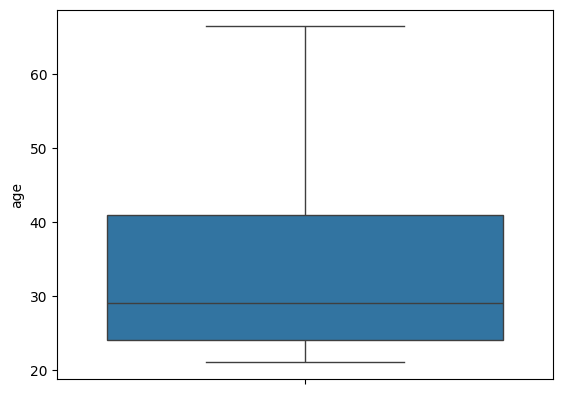

In [248]:
sns.boxplot(df['age'])

In [249]:
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72.0,35,0.0,33.6,0.627,50.0,1
1,1,85,66.0,29,0.0,26.6,0.351,31.0,0
2,8,183,64.0,0,0.0,23.3,0.672,32.0,1
3,1,89,66.0,23,94.0,28.1,0.167,21.0,0
4,0,137,40.0,35,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,63.0,0
764,2,122,70.0,27,0.0,36.8,0.340,27.0,0
765,5,121,72.0,23,112.0,26.2,0.245,30.0,0
766,1,126,60.0,0,0.0,30.1,0.349,47.0,1


##**Visualizing the missing values in dataset (if any)**

<Axes: >

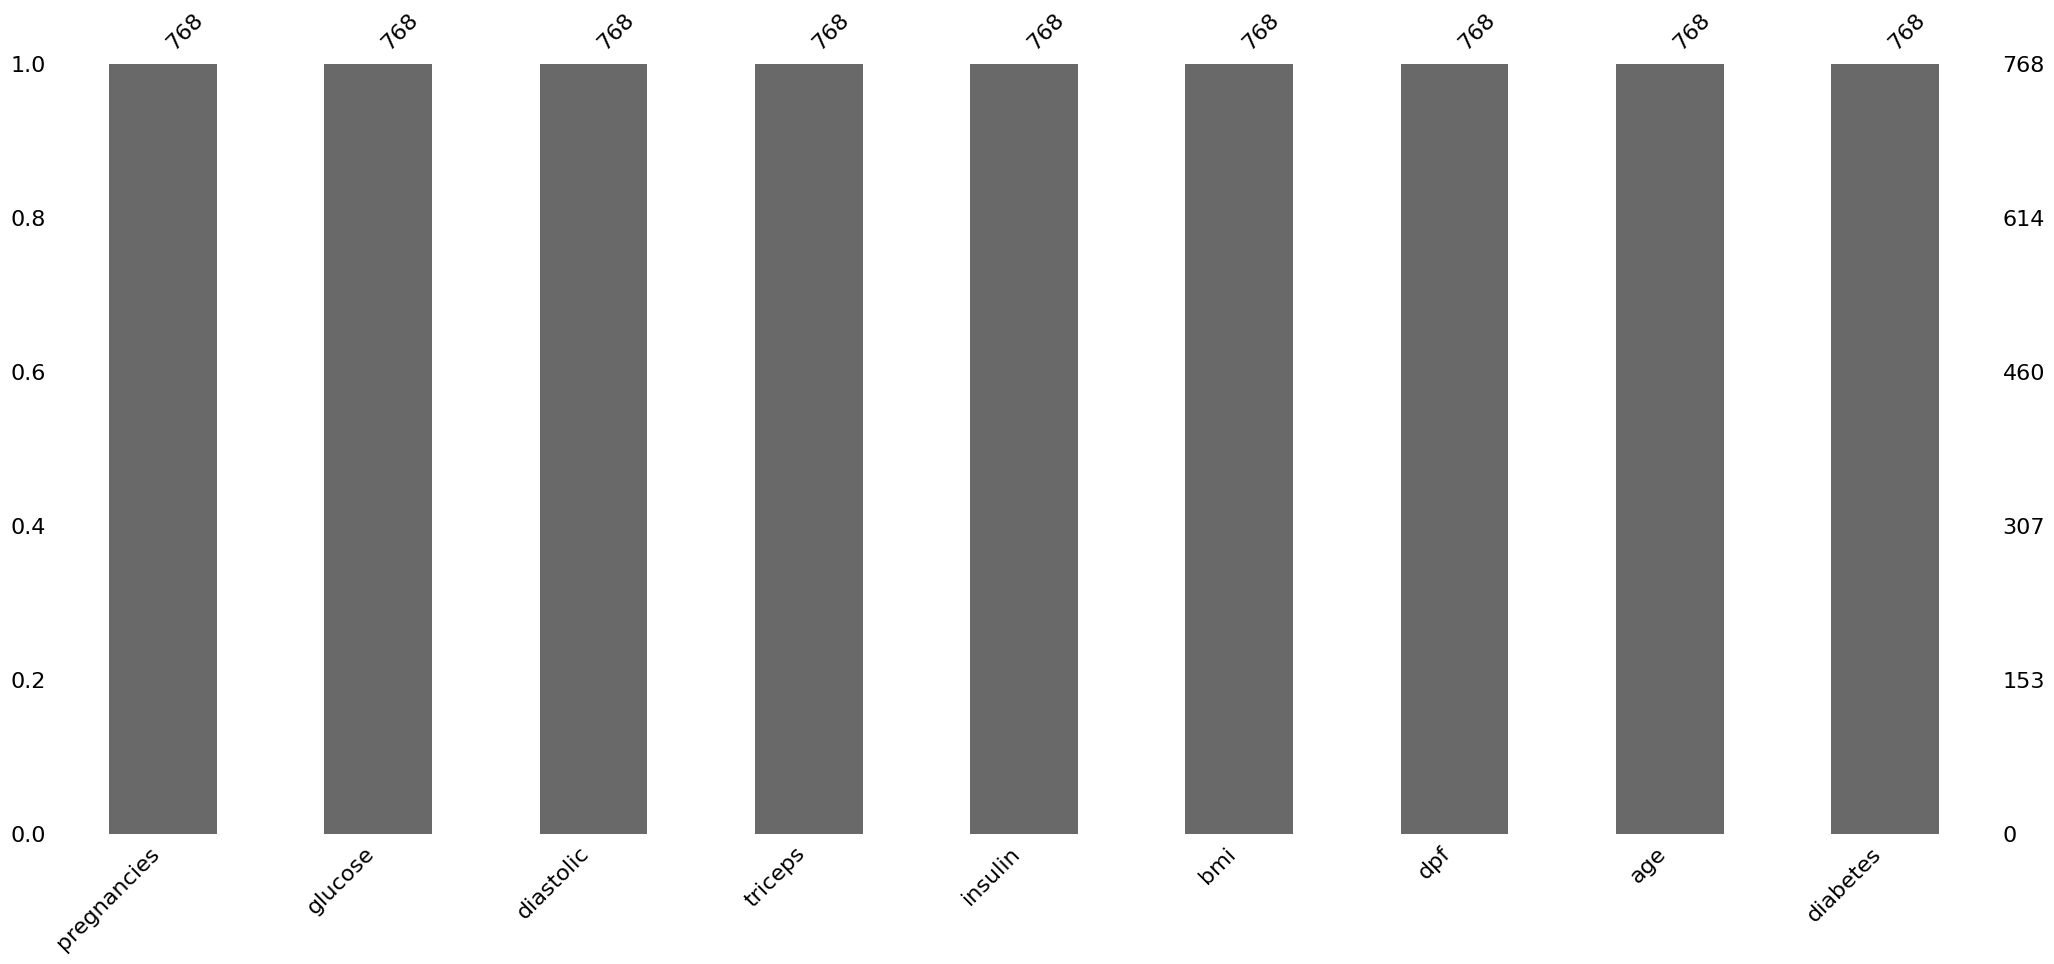

In [250]:
import missingno as msno
msno.bar(df)

In [251]:
df.isna().sum()

,0
pregnancies,0
glucose,0
diastolic,0
triceps,0
insulin,0
bmi,0
dpf,0
age,0
diabetes,0


##**Checking for duplicate values**

In [252]:
df.duplicated().sum()

0

#**Preprocessed Dataset**

In [253]:
df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72.0,35,0.0,33.6,0.627,50.0,1
1,1,85,66.0,29,0.0,26.6,0.351,31.0,0
2,8,183,64.0,0,0.0,23.3,0.672,32.0,1
3,1,89,66.0,23,94.0,28.1,0.167,21.0,0
4,0,137,40.0,35,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,63.0,0
764,2,122,70.0,27,0.0,36.8,0.340,27.0,0
765,5,121,72.0,23,112.0,26.2,0.245,30.0,0
766,1,126,60.0,0,0.0,30.1,0.349,47.0,1


#**Defining target variable(y) and feature variable(x)**

In [254]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [255]:
y = df['diabetes']
x = df[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age']]

In [256]:
y.value_counts()

,count
diabetes,
0,500
1,268


#**Imbalanced Dataset**

##**Exploratory Data Analysis (EDA)**

In [257]:
import statsmodels.api as sm
model = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.587883
         Iterations 5


In [258]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Fri, 06 Sep 2024   Pseudo R-squ.:                 0.09109
Time:                        05:43:38   Log-Likelihood:                -451.49
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.790e-17
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
pregnancies     0.1281      0.029      4.396      0.000       0.071       0.185
glucose         0.0180      0.003      6.132      0.000       0.012       0.024
diastolic      -0.0494      0.006     -8.063    

In [259]:
x.shape

(768, 8)

In [260]:
copy_x = x.copy()

In [261]:
x = x.drop(['triceps','insulin','bmi','dpf','age'],axis=1)

##**Train-Test Split**

In [262]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, train_size=0.65, random_state=2529 )

##**Model Selection**

In [263]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

##**Training the model**

In [264]:
logit.fit(x_train,y_train)

LogisticRegression()

##**Testing the model**

In [265]:
y_pred = logit.predict(x_test)

##**Calculating the metrics**

In [266]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[155,  16],
       [ 51,  47]])

In [267]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       171
           1       0.75      0.48      0.58        98

    accuracy                           0.75       269
   macro avg       0.75      0.69      0.70       269
weighted avg       0.75      0.75      0.74       269



#**Balanced Dataset**

In [268]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [269]:
x_ros, y_ros = ros.fit_resample(copy_x,y)

In [270]:
y_ros.value_counts()

,count
diabetes,
1,500
0,500


In [271]:
x_ros.shape

(1000, 8)

##**Exploratory Data Analysis (EDA)**

In [272]:
import statsmodels.api as sm
model = sm.Logit(y_ros, x_ros).fit()

Optimization terminated successfully.
         Current function value: 0.612654
         Iterations 5


In [273]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      992
Method:                           MLE   Df Model:                            7
Date:                Fri, 06 Sep 2024   Pseudo R-squ.:                  0.1161
Time:                        05:43:50   Log-Likelihood:                -612.65
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                 1.989e-31
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
pregnancies     0.1143      0.024      4.754      0.000       0.067       0.161
glucose         0.0176      0.002      7.177      0.000       0.013       0.022
diastolic      -0.0485      0.005     -8.958    

In [280]:
x_ros = x_ros.drop(['triceps','insulin','bmi','dpf','age'],axis=1)

##**Train-Test Split**

In [281]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, train_size=0.65, random_state=2529)

##**Model Selection**

In [282]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

##**Training the model**

In [283]:
logit.fit(x_train,y_train)

LogisticRegression()

##**Testing the model**

In [284]:
y_pred = logit.predict(x_test)

##**Calculating the metrics**

In [285]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[138,  39],
       [ 59, 114]])

In [286]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       177
           1       0.75      0.66      0.70       173

    accuracy                           0.72       350
   macro avg       0.72      0.72      0.72       350
weighted avg       0.72      0.72      0.72       350



#**Conclusion** - The current classification model shows suboptimal accuracy, indicating that it may not be fully capturing the underlying patterns in the data. To improve the model's performance, it would be beneficial to explore the inclusion of additional feature variables. These could help the model better differentiate between classes and increase its predictive power. Further feature engineering and refinement are recommended to enhance the model's accuracy and overall effectiveness."